### Objective
Google Play Store team is about to launch a new feature where in certain apps that are 
promising are boosted in visibility. The boost will manifest in multiple ways – higher priority in 
recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). 
These will also get a boost in visibility in search results. This feature will help bring more 
attention to newer apps that have potential.

The task is to understand what makes an app perform well - size? price? category? multiple 
factors together? Analyze the data and present your insights in a format consumable by 
business – the final output of the analysis would be presented to business as insights with 
supporting data/visualizations.

### Data

In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv("D:/ketan/Datasets/playstore-analysis (2) (1).csv")
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.000000,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### Tasks
#### 1. Data clean up – Missing value treatment

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [3]:
np.shape(df)

(10841, 13)

#### a. Drop records where rating is missing since rating is our target/study variable

In [4]:
df["Rating"].isnull().sum()
#### df["Rating"].isna().sum()

1474

In [5]:
df.dropna(axis="rows",subset=["Rating"],inplace=True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


#### b. Check the null values for the Android Ver column. 

In [6]:
df[df["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


#### i. Are all 3 records having the same problem?
No, all 3 records does not have same problem. 

#### ii. Drop the 3rd record i.e. record for “Life Made WIFI …”

In [7]:
df.drop(index=10472,inplace=True)
df[df["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


#### iii. Replace remaining missing values with the mode

In [8]:
df["Android Ver"].mode()

0    4.1 and up
dtype: object

In [9]:
df["Android Ver"].fillna(df["Android Ver"].mode()[0],inplace=True)
df[df["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#### c. Current ver – replace with most common value

In [10]:
df["Current Ver"].mode()

0    Varies with device
dtype: object

In [11]:
df["Current Ver"].fillna(df["Current Ver"].mode()[0],inplace=True)
df[df["Current Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### 2. Data clean up – correcting the data types
#### a. Which all variables need to be brought to numeric types?
 Reviews to int, 
 Installs to int,
 and Price to float 

#### b. Price variable – remove dollar sign and convert to float

In [12]:
df["Price"]=df.Price.apply(lambda x: x.strip("$"))
df["Price"]=df.Price.astype(float)

#### c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [13]:
df["Installs"]=df.Installs.apply(lambda x: x.replace(",",""))
df["Installs"]=df.Installs.apply(lambda x: x.strip("+"))

In [14]:
df["Installs"].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '100', '500', '10', '5', '50', '1'], dtype=object)

In [15]:
df["Installs"]=df.Installs.astype(int)

#### d. Convert all other identified columns to numeric

In [16]:
df["Reviews"]=df.Reviews.astype(int)

### 3. Sanity checks – check for the following and handle accordingly
#### a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.

#### i. Are there any such records? Drop if so.
Avg. rating is between 1 and 5 only.

In [17]:
df["Rating"].sort_values().unique()

array([1. , 1.2, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4,
       2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7,
       3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])

#### b. Reviews should not be more than installs as only those who installed can review the app.
#### i. Are there any such records? Drop if so.

Reviews are less than the installs

In [18]:
df["Reviews"].sum()>df["Installs"].sum()

False

In [50]:
q= pd.DataFrame()
q= df[df.Reviews <= df.Installs]
q

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,binned,Size_Buckets
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,"(0, 20000]",MED
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,"(0, 20000]",MED
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,"(0, 20000]",LOW
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,"(0, 20000]",VERY LOW
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.000000,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,"(0, 20000]",LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,"(0, 20000]",VERY LOW
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,"(40000, 60000]",VERY HIGH
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,"(0, 20000]",VERY LOW
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,"(20000, 40000]",HIGH


### 4. Identify and handle outliers – 
#### a. Price column
#### i. Make suitable plot to identify outliers in price

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Price', ylabel='Type'>

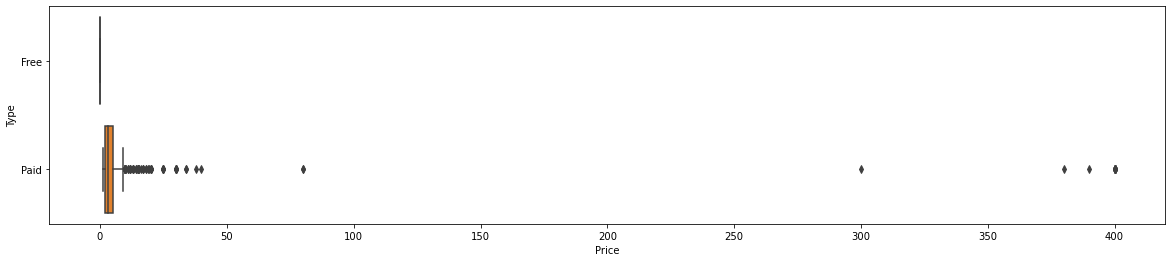

In [20]:
plt.figure(figsize=(20,4))
sns.boxplot(x="Price", y="Type",data=df)

#### ii. Do you expect apps on the play store to cost dollar 200? Check out these cases
No, we do not expect apps on play store to cost dollar 200.
These are too expensive apps.

In [21]:
df[df["Price"]>=200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


#### iii. After dropping the useless records, make the suitable plot again to identify outliers

In [22]:
df.drop(df[df["Price"]>=200].index,inplace=True)

<AxesSubplot:xlabel='Price', ylabel='Type'>

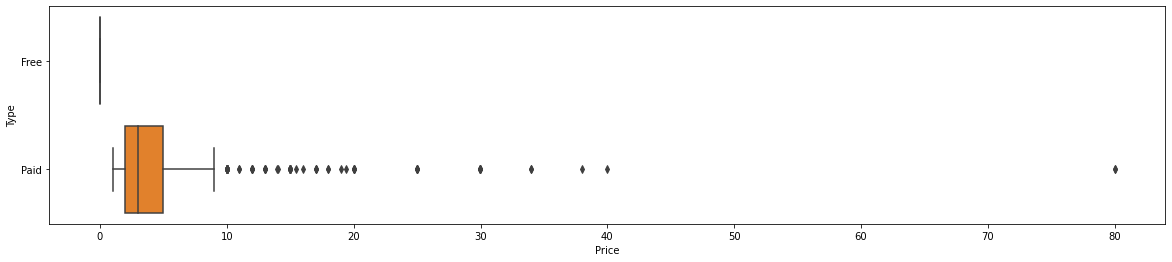

In [23]:
plt.figure(figsize=[20,4])
sns.boxplot(x="Price",y="Type",data=df)

#### iv. Limit data to records with price < $30

In [24]:
df.drop(df[df["Price"]>30].index,inplace=True)

#### b. Reviews column
#### i. Make suitable plot

<AxesSubplot:xlabel='Reviews', ylabel='Category'>

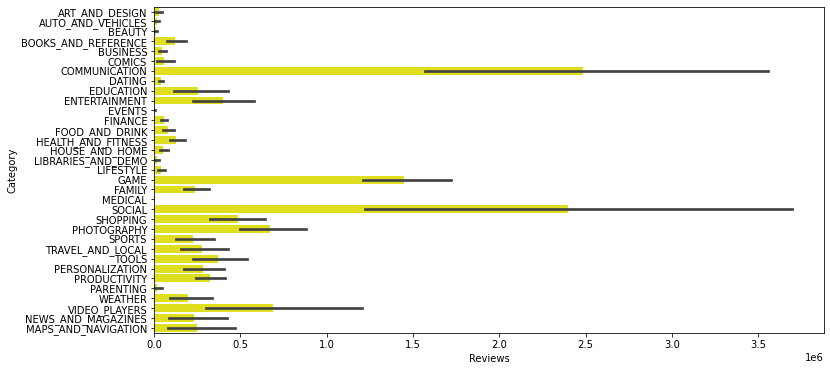

In [25]:
plt.figure(figsize=[12,6])
sns.barplot(x="Reviews",y="Category",data=df,color="Yellow")

#### ii. Limit data to apps with < 1 Million reviews

In [26]:
df.drop(df[df["Reviews"]>1000000].index,inplace=True)

#### c. Installs
#### i. What is the 95th percentile of the installs?

In [27]:
np.percentile(df["Installs"],95)

10000000.0

#### ii. Drop records having a value more than the 95th percentile

In [28]:
df.drop(df[df["Installs"]>(np.percentile(df["Installs"],95))].index,inplace=True)
df[df["Installs"]>10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### Data analysis to answer business questions
#### 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

The distribution of ratings are left skewed and this is also called a negative skewed distribution.
It's long tail on the negative direction.

<AxesSubplot:xlabel='Rating', ylabel='count'>

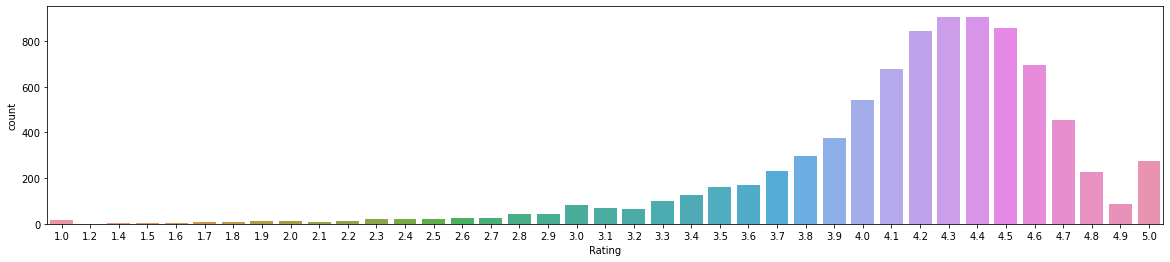

In [29]:
plt.figure(figsize=[20,4])
sns.countplot(x="Rating",data=df)

#### a. How do you explain this?
Here, the distribution says that the maximum number of the ratings are in between 4 and 5.

#### b. What is the implication of this on your analysis?
1.More apps are rated between 4 & 5

2.There are very few apps which are rated less than 3

3.Maximum number of apps are rated 4.3 & 4.4

### 6. What are the top Content Rating values?

In [30]:
df.groupby(["Content Rating"]).agg({"Rating":sum}).sort_values(by="Rating",ascending=False)

,Rating
Content Rating,
Everyone,28305.6
Teen,3782.7
Mature 17+,1709.6
Everyone 10+,1400.6
Adults only 18+,12.9
Unrated,4.1


#### a. Are there any values with very few records?
Yes, Adults only 18+ and unrated.
#### b. If yes, drop those as they won’t help in the analysis

In [31]:
df.drop(df[df["Content Rating"]=="Adults only 18+"].index,inplace=True)
df.drop(df[df["Content Rating"]=="Unrated"].index,inplace=True)

In [32]:
df.groupby(["Content Rating"]).agg({"Rating":sum}).sort_values(by="Rating",ascending=False)

,Rating
Content Rating,
Everyone,28305.6
Teen,3782.7
Mature 17+,1709.6
Everyone 10+,1400.6


### 7. Effect of size on rating
#### a. Make a joinplot to understand the effect of size on rating
#### b. Do you see any patterns?
Yes, the maximum ratings are distributed between 3.5 to 5 and size 0-40000.
#### c. How do you explain the pattern?
The application size between 0-40000 have got good ratings on Play Store.

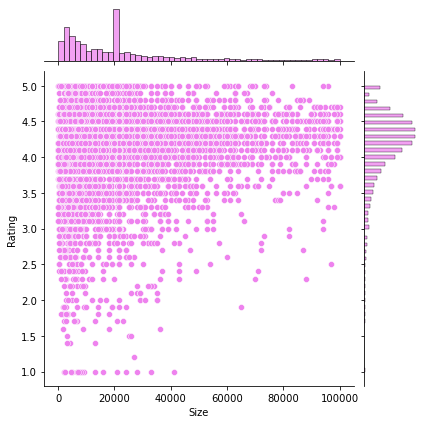

In [33]:
sns.jointplot(x="Size",y="Rating",data=df,color="Violet")

### 8. Effect of price on rating
#### a. Make a jointplot (with regression line)
#### b. What pattern do you see?
Increase in price increases the ratings. 
#### c. How do you explain the pattern?
The good quality apps gets higher ratings and hence the prices are higher. 

<AxesSubplot:xlabel='Price', ylabel='Rating'>

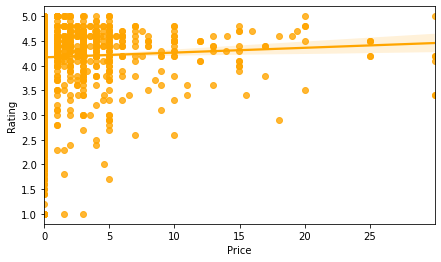

In [34]:
plt.figure(figsize=[7,4])
sns.regplot(x="Price",y="Rating",data=df, color="Orange",scatter=True)

#### d. Replot the data, this time with only records with price > 0 
#### e. Does the pattern change?
Yes, Increase in price does not increase the ratings much.
#### f. What is your overall inference on the effect of price on the rating
Apps between price of dollar 1-10 are likely to be rated better than that of higher prices.

<AxesSubplot:xlabel='Price', ylabel='Rating'>

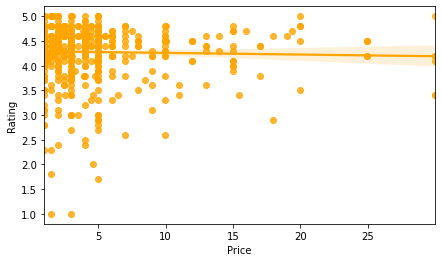

In [35]:
df1=df[df["Price"]>0]
plt.figure(figsize=[7,4])
sns.regplot(x="Price",y="Rating",data=df1,color="Orange",scatter=True)

### 9. Look at all the numeric interactions together – 
#### a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

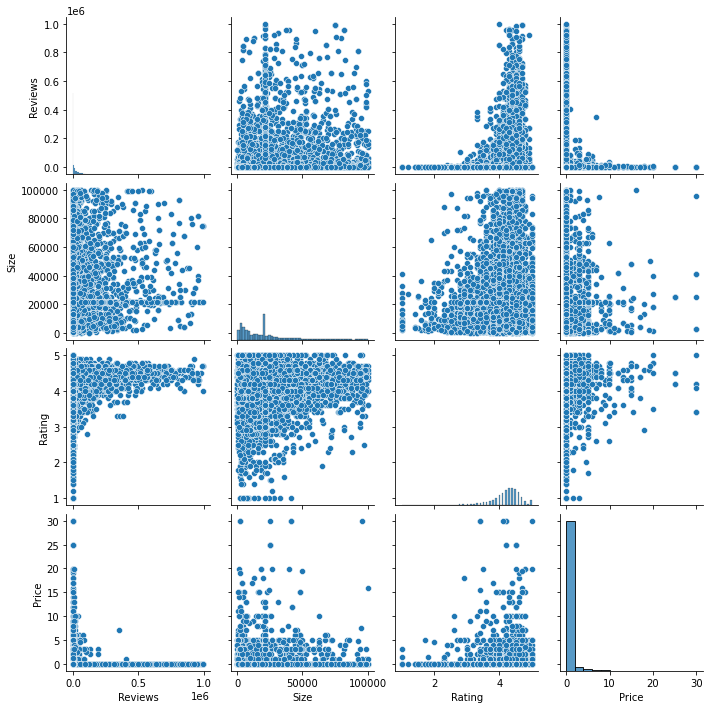

In [36]:
sns.pairplot( df, x_vars=["Reviews", "Size", "Rating","Price"], y_vars=["Reviews", "Size", "Rating","Price"])

### 10. Rating vs. content rating
#### a. Make a bar plot displaying the rating for each content rating

<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

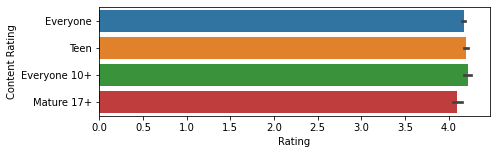

In [37]:
plt.figure(figsize=[7,2])
sns.barplot(x="Rating",y="Content Rating",data=df)

#### b. Which metric would you use? Mean? Median? Some other quantile?
Median
#### c. Choose the right metric and plot

In [38]:
from numpy import median
y=df.groupby(["Content Rating"]).agg({"Rating": median})
y

,Rating
Content Rating,
Everyone,4.3
Everyone 10+,4.3
Mature 17+,4.2
Teen,4.2


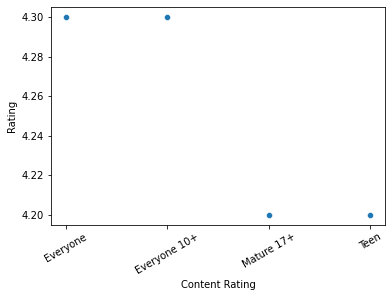

In [39]:
sns.scatterplot(x="Content Rating", y="Rating", data=y)
plt.xticks(rotation=30)
plt.show()

### 11. Content rating vs. size vs. rating – 3 variables at a time
#### a. Create 5 buckets (20% records in each) based on Size

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


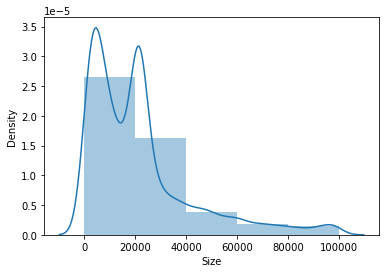

In [4]:
#Checking skewness
sns.distplot(df["Size"], bins=5)
plt.show()

In [42]:
bins=[0, 4600, 12000, 21516, 32000, 100000]
df['Size_Buckets'] = pd.cut(df['Size'], bins, labels=['VERY LOW','LOW','MED','HIGH','VERY HIGH'])
pd.pivot_table(df, values='Rating', index='Size_Buckets', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
VERY LOW,4.116465,4.188889,3.951429,4.224468
LOW,4.158700,4.207143,4.129592,4.208511
MED,4.180894,4.300000,3.883582,4.123973
HIGH,4.214549,4.199174,4.163333,4.170435
VERY HIGH,4.185690,4.215702,4.193814,4.244483


#### b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [43]:
df.Size.quantile([0.2, 0.4,0.6,0.8])

0.2     4600.000000
0.4    12000.000000
0.6    21516.529524
0.8    32000.000000
Name: Size, dtype: float64

In [44]:
df.Rating.quantile([0.2, 0.4,0.6,0.8])

0.2    3.9
0.4    4.2
0.6    4.4
0.8    4.6
Name: Rating, dtype: float64

In [45]:
Size_Buckets =pd.pivot_table(df, values='Rating', index='Size_Buckets', columns='Content Rating', 
                     aggfunc=lambda x:np.quantile(x,0.2))
Size_Buckets

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
VERY LOW,3.8,3.84,3.28,3.86
LOW,3.8,3.94,3.64,3.80
MED,3.9,4.16,3.50,3.90
HIGH,4.0,4.00,3.98,3.90
VERY HIGH,3.9,4.00,4.00,4.00


#### c. Make a heatmap of this
##### i. Annotated
##### ii. Greens color map

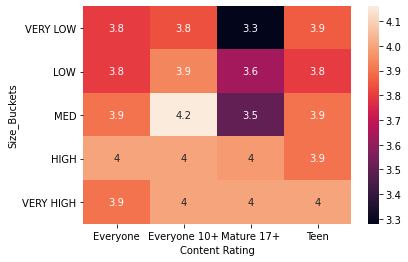

In [46]:
sns.heatmap(Size_Buckets, annot = True)
plt.show()

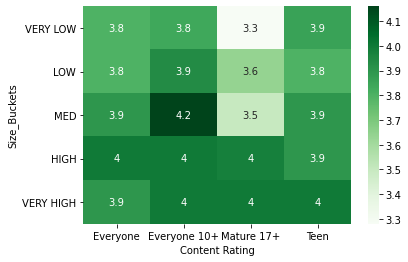

In [47]:
sns.heatmap(Size_Buckets, annot=True, cmap='Greens')
plt.show()

#### d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some

The apps with size high or very high are rated good. Although for other categories the rating is not bad for similar sizes but especially in the category 17+ only the apps with size high or very high are prefered.